### Decision-Tree

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [114]:
from sklearn.datasets import load_iris

In [115]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [116]:
x=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [117]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
### Dependent Features 
y=iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [121]:
### Apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(max_depth=4,max_features='sqrt',criterion='gini',splitter='best')

In [122]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

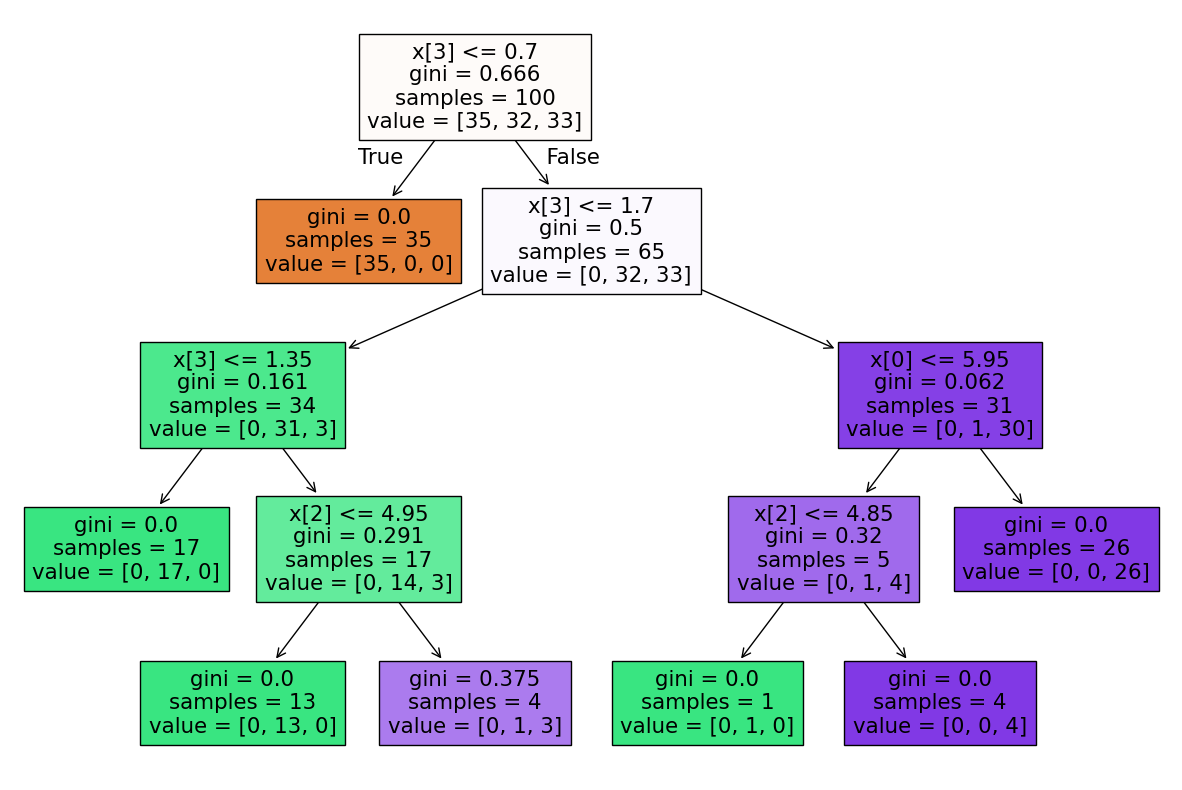

In [123]:
### Visualize the decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

In [124]:
y_pred=treeclassifier.predict(x_test)


In [125]:
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 16]])

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Decision tree Preprunning

In [128]:
param={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [131]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [132]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [133]:
grid.best_score_

np.float64(0.9700000000000001)

In [134]:
y_pred2=grid.predict(x_test)

In [135]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[15  0  0]
 [ 0 15  3]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.83      0.88        18
           2       0.84      0.94      0.89        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [136]:
from sklearn.metrics import accuracy_score

In [137]:
score=accuracy_score(y_test,y_pred2)
score

0.92

### Diabetes Predictions 

In [138]:
from sklearn.datasets import load_diabetes

In [139]:
dataset=load_diabetes()

In [140]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [141]:
### Independent Variable
x=pd.DataFrame(dataset.data, columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [142]:
### Dependent Variable 
y=pd.DataFrame(dataset.target)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [145]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((296, 10), (146, 10), (296, 1), (146, 1))

In [146]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.166017,0.188051,0.367905,0.212463,0.160112,-0.056615,0.167667,0.278071,0.323159
sex,0.166017,1.000000,0.115508,0.192427,0.014526,0.099257,-0.356400,0.301726,0.177428,0.163858
bmi,0.188051,0.115508,1.000000,0.405999,0.248239,0.278658,-0.379807,0.426428,0.423680,0.344226
bp,0.367905,0.192427,0.405999,1.000000,0.219794,0.191632,-0.206537,0.258903,0.371574,0.374862
s1,0.212463,0.014526,0.248239,0.219794,1.000000,0.907566,0.079861,0.537047,0.524473,0.348932
s2,0.160112,0.099257,0.278658,0.191632,0.907566,1.000000,-0.157769,0.645648,0.354215,0.329022
s3,-0.056615,-0.356400,-0.379807,-0.206537,0.079861,-0.157769,1.000000,-0.723924,-0.409505,-0.254308
s4,0.167667,0.301726,0.426428,0.258903,0.537047,0.645648,-0.723924,1.000000,0.653364,0.413952
s5,0.278071,0.177428,0.423680,0.371574,0.524473,0.354215,-0.409505,0.653364,1.000000,0.451486
s6,0.323159,0.163858,0.344226,0.374862,0.348932,0.329022,-0.254308,0.413952,0.451486,1.000000


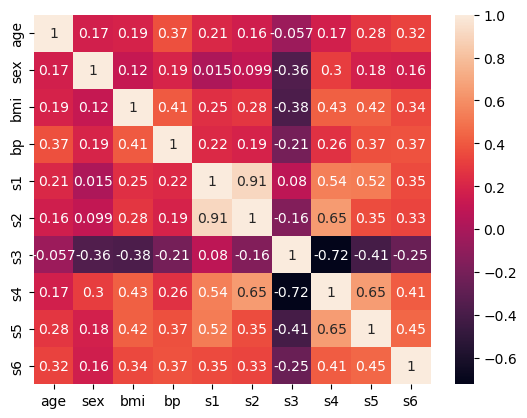

In [151]:
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [152]:
import warnings
warnings.filterwarnings('ignore')


In [153]:
from sklearn.tree import DecisionTreeRegressor


In [155]:
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

### We have to perform the hyperparameter tunning 

In [176]:
params={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2']
}

In [177]:
grid=GridSearchCV(regressor,param_grid=params, cv=5,n_jobs=-1, scoring='neg_mean_squared_error')

In [181]:
grid.fit(x_train,y_train)
y_pred4=grid.predict(x_test)

In [183]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [184]:
grid.best_score_

np.float64(-3533.1640937049756)

<Figure size 1500x1000 with 0 Axes>

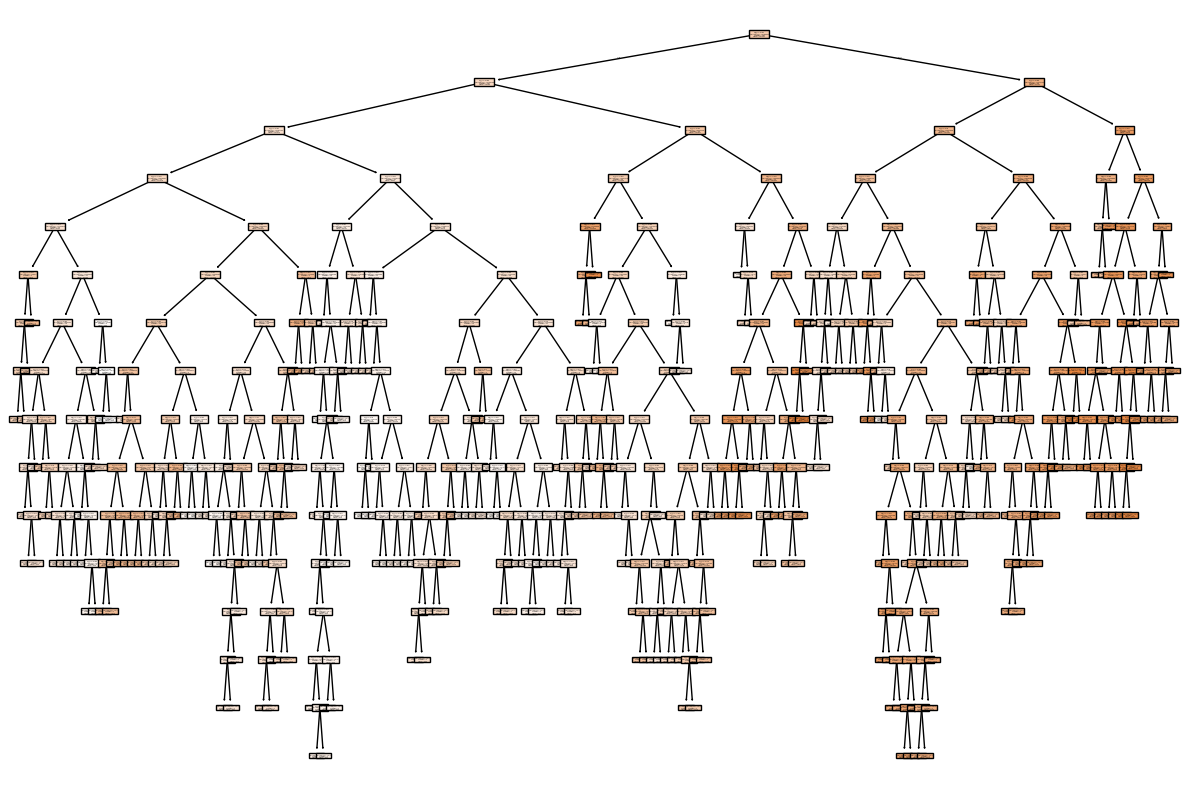

In [187]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled=True)
plt.show()